In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
houses=pd.read_csv("USA_Housing.csv")

In [5]:
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
type(houses)

pandas.core.frame.DataFrame

In [7]:
houses.shape

(5000, 7)

In [8]:
houses.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<AxesSubplot:>

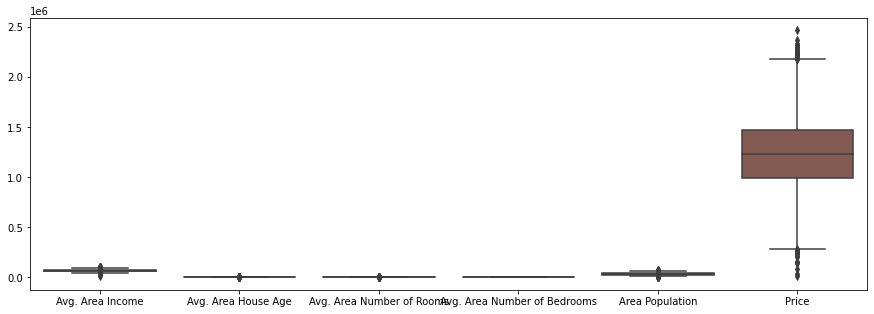

In [9]:
import seaborn as sns
plt.figure(figsize = (15,5))
sns.boxplot(data = houses)

In [10]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers
for i in houses.columns[0:6]:
    sample_outliers = detect_outliers_iqr(houses[i])
    print("Outliers from IQR method: ", len(sample_outliers))


Outliers from IQR method:  32
Outliers from IQR method:  25
Outliers from IQR method:  24
Outliers from IQR method:  0
Outliers from IQR method:  30
Outliers from IQR method:  35


In [11]:
def remove_outlier(df_in, col_name):
    data=df_in[col_name]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1 
    lwr_bound  = q1-1.5*IQR
    upr_bound= q3+1.5*IQR
    df_out = np.clip(data, lwr_bound, upr_bound)
    return df_out
a=[]
for i in houses.columns[0:6]:
    a.append(remove_outlier(houses, i))
a=np.array(a)
a=pd.DataFrame(a.reshape(6,5000).T)
a=a.rename(columns={
    0:"Avg. Area Income",1:"Avg. Area House Age",2:"Avg. Area Number of Rooms",3:"Avg. Area Number of Bedrooms",4:"Area Population",5:"Price"
})
a


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,40026.397972,3.329495,4.249318,2.0,9217.885601,2.871275e+05
1,40026.397972,3.329495,4.249318,2.0,9217.885601,2.871275e+05
2,40026.397972,3.329495,4.249318,2.0,9217.885601,2.871275e+05
3,40026.397972,3.329495,4.249318,2.0,9217.885601,2.871275e+05
4,40026.397972,3.329495,4.249318,2.0,9217.885601,2.871275e+05
...,...,...,...,...,...,...
4995,97237.503083,8.643597,9.715803,6.5,63047.333870,2.181660e+06
4996,97237.503083,8.643597,9.715803,6.5,63047.333870,2.181660e+06
4997,97237.503083,8.643597,9.715803,6.5,63047.333870,2.181660e+06
4998,97237.503083,8.643597,9.715803,6.5,63047.333870,2.181660e+06


In [12]:
a.shape

(5000, 6)

<AxesSubplot:>

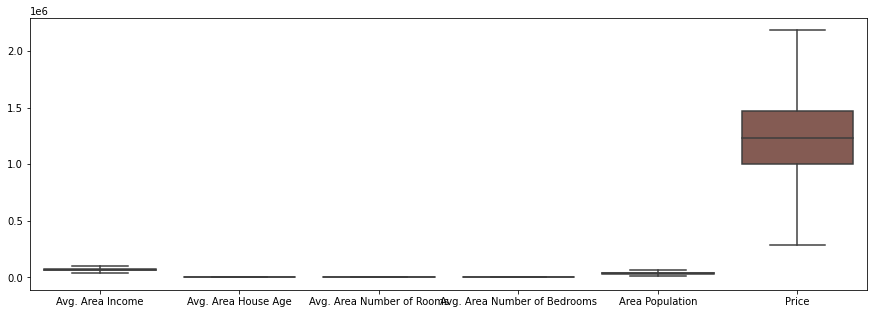

In [13]:
plt.figure(figsize = (15,5))
sns.boxplot(data=a)

In [14]:
Y = a.Price.values.reshape(-1,1)
X =a.iloc[:,0:5].values.reshape(5000,5)
regression=LinearRegression()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 [-898191.00846761]
Coefficients: 
 [[6.43639101e+00 1.42098562e+05 9.56907659e+04 2.64893812e+03
  4.43141185e+00]]


In [18]:
y_pred = regression.predict(X_test)
print ('Predicted Price: \n', y_pred, y_test)

Predicted Price: 
 [[ 732945.6958049 ]
 [1490094.52589861]
 [1882325.37668261]
 [1713888.45230161]
 [ 827882.81159705]
 [1242113.79350425]
 [ 974801.95122715]
 [1182419.93774803]
 [ 565137.11499872]
 [1239536.4506352 ]
 [1544952.58076222]
 [ 997825.73298785]
 [1772270.06035816]
 [ 700118.57820519]
 [ 910779.9416318 ]
 [1357058.7033441 ]
 [ 770410.02206037]
 [1293959.31799122]
 [1100580.68763131]
 [1228487.75755798]
 [ 576232.37147926]
 [1058555.75260579]
 [ 735314.35086147]
 [1601053.11597035]
 [1835377.76771241]
 [ 959679.19217225]
 [1336037.16875568]
 [1602887.47081777]
 [1461079.71507735]
 [ 758882.60503071]
 [1548159.93625415]
 [1496174.4910935 ]
 [1642835.73417561]
 [1123602.24693163]
 [1218279.78566084]
 [1018913.71996794]
 [1476617.47999559]
 [1434110.85978669]
 [1504365.79241026]
 [1399827.14655103]
 [1444323.8154582 ]
 [1242973.83967026]
 [1750410.00941023]
 [1059707.22545694]
 [ 817173.32411178]
 [1173063.20342133]
 [ 840640.28858607]
 [1577209.04932914]
 [ 721352.17470266]
 

In [19]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9998658663054723


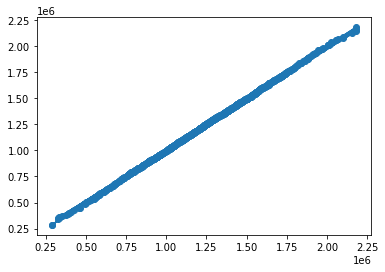

In [20]:

plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred)